## Parzen

In [9]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [8]:
def minkowski_vec(x,y,p=2.0):
    dist = np.sum((np.abs(x-y)**p))**(1.0/p)
    return dist

In [76]:
class est_den_parzen_n_gau_iso:

    def __init__(self,n_dims):
        self.n_dims = n_dims
        
    # Garder train_data comme une variable de la classe est_den_parzen_n_gau_iso
    def train(self, train_data):
        self.train_data = train_data         
        
    # Retourne un vecteur de taille nb. ex. de test contenant les log
    # probabilités de chaque exemple de test sous le modèle.    
    def compute_predictions(self, test_data, sigma = 1):
        self.sigma = sigma   
        est_den = np.zeros((test_data.shape[0]))     
        
        #c = (1/(((2*np.pi)**0.5)*self.sigma)**self.n_dims)
        c = -self.n_dims * np.log(2*np.pi)/2.0 - self.n_dims*np.log(self.sigma)
        
        # Pour chaque vecteur x dans test_data on va calcule l'estimation de la densité
        for i in range(test_data.shape[0]):
            somme = 0
            
            for j in range(self.train_data.shape[0]):
                # log(constante de normalisation)
                
                # il faut calculer la valeur de la log-probabilite de chaque exemple
                # de test sous le modele determine par mu et sigma_sq. le vecteur
                # des probabilites est/sera log_prob
                log_prob = c - np.sum((test_data[i] -  self.train_data[j])**2.0) / (2.0 * self.sigma**2)
                
                
                #dist = minkowski_vec(test_data[i],self.train_data[j])
                dist = np.sum((test_data[i] -  self.train_data[j])**2.0)
                #somme += c*np.e**-(dist)/(2*self.sigma**2)
                somme += np.e**log_prob
                
            est_den[i] = somme/self.train_data.shape[0]
        return est_den

[ 2.3  2.9  3.   3.   3.   3.   3.   3.   3.1  3.1  3.1  3.1  3.2  3.2  3.2
  3.2  3.2  3.3  3.3  3.4  3.4  3.4  3.4  3.4  3.4  3.4  3.4  3.4  3.5  3.5
  3.5  3.5  3.5  3.5  3.6  3.6  3.6  3.7  3.7  3.7  3.8  3.8  3.8  3.8  3.9
  3.9  4.   4.1  4.2  4.4]


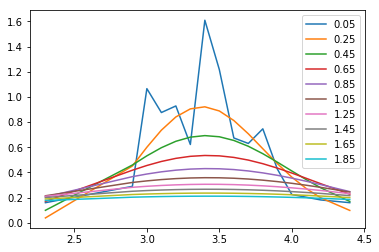

In [80]:
iris=np.loadtxt('iris.txt')
iris_train = iris[:50]
iris_train1 = iris_train[:,1]
#print iris_test1
iris_train1 = sort(iris_train1)
print iris_train1

for i in range(1,40,4):
    sigma = i/20.
    est_den_parzen = est_den_parzen_n_gau_iso(1)
    est_den_parzen.train(iris_train1)
    result_parzen = est_den_parzen.compute_predictions(iris_train1,sigma)
    #print result_parzen
    x = iris_train1
    y = result_parzen
    label = str(sigma)
    pylab.plot(x, y, label=label)
    pylab.legend(loc='upper right')